       dates   Visitatori Patologia
0 2023-01-01  1647.042738     cuore
1 2023-01-02  1074.463228      ossa
2 2023-01-03  1780.721882     cuore
3 2023-01-04  2567.430167     cuore
4 2023-01-05   984.866358      ossa


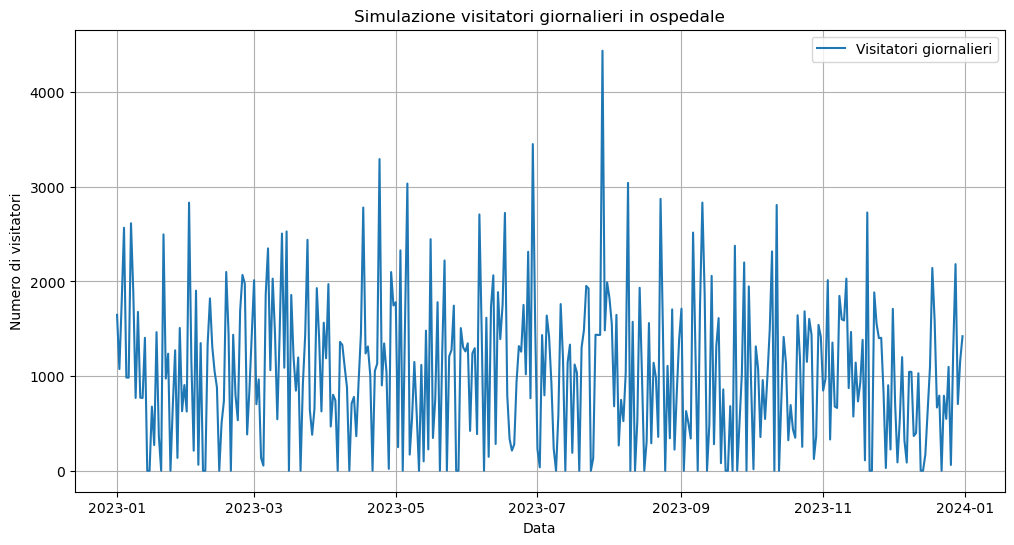

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parametri
n_giorni = 365
media = 1200
dev_std = 900

# Genera la serie di visitatori con rumore casuale
np.random.seed(42)  # Per riproducibilità
visitatori = np.random.normal(loc=media, scale=dev_std, size=n_giorni)

# Aggiungi un trend decrescente (es. diminuzione lineare)
trend_decrescente = np.linspace(0, -400, n_giorni)
visitatori_con_trend = visitatori + trend_decrescente

# Assicura che il numero di visitatori non sia negativo
visitatori_con_trend = np.clip(visitatori_con_trend, 0, None)

# Crea un DataFrame con le date come colonna
date = pd.date_range(start="2023-01-01", periods=n_giorni)
patologie = np.random.choice(["ossa", "cuore", "testa"], size=n_giorni)
df = pd.DataFrame({"dates": date, "Visitatori": visitatori_con_trend, "Patologia": patologie})

# Visualizza il DataFrame
print(df.head())

# Visualizza il risultato
plt.figure(figsize=(12, 6))
plt.plot(df["dates"], df["Visitatori"], label="Visitatori giornalieri")
plt.title("Simulazione visitatori giornalieri in ospedale")
plt.xlabel("Data")
plt.ylabel("Numero di visitatori")
plt.legend()
plt.grid(True)
plt.show()



In [49]:
df['month'] = df['dates'].dt.to_period('M')
media_visitatori_mese = df.groupby('month')['Visitatori'].mean()
print('\n',media_visitatori_mese)
std_visitatori_mese = df.groupby('month')['Visitatori'].std()
print('\n',std_visitatori_mese)
count_patologie = df.groupby('Patologia')['Visitatori'].count()
print('\n',count_patologie)


 month
2023-01    1037.776064
2023-02    1067.286419
2023-03    1219.990801
2023-04    1102.040240
2023-05    1015.642161
2023-06    1281.821713
2023-07    1099.436126
2023-08     999.594919
2023-09     961.913333
2023-10     977.338351
2023-11    1069.693034
2023-12     801.592043
Freq: M, Name: Visitatori, dtype: float64

 month
2023-01    744.729793
2023-02    768.374959
2023-03    759.862235
2023-04    754.723880
2023-05    855.901658
2023-06    850.163017
2023-07    906.621603
2023-08    798.904452
2023-09    912.330671
2023-10    687.324714
2023-11    685.191914
2023-12    607.258144
Freq: M, Name: Visitatori, dtype: float64

 Patologia
cuore    126
ossa     124
testa    115
Name: Visitatori, dtype: int64
